In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from skimage import data, color, io
from skimage.feature import Cascade

In [35]:
from skimage.io import imread
import cv2 as cv

ModuleNotFoundError: No module named 'cv2'

In [26]:
night_image = imread(
'/Users/juansantateresagomez/Desktop/Image_Processing/Image Processing with Python course exercise dataset/chapter 4/face_det3.jpg')

In [40]:
from skimage.util import img_as_float

In [43]:
night_image = img_as_float(night_image)

In [44]:
trained_file = data.lbp_frontal_face_cascade_filename()

In [45]:
trained_file

'/Users/juansantateresagomez/opt/anaconda3/lib/python3.7/site-packages/skimage/data/lbpcascade_frontalface_opencv.xml'

In [46]:
detector = Cascade(trained_file)

In [58]:
detected = detector.detect_multi_scale(
    img = night_image, 
    scale_factor = 1.2, 
    step_ratio = 1, 
    min_size=(10,10), 
    max_size=(200,200))





In [59]:
detected

[{'r': 774, 'c': 131, 'width': 40, 'height': 40}]

In [55]:
import matplotlib.patches as patches

In [67]:
def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()

In [69]:
def show_detected_face(result, detected, title='Face Image'):
    
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    
    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
    
    crop_face(result, detected)

        
        
        

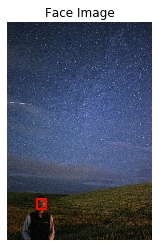

{'r': 774, 'c': 131, 'width': 40, 'height': 40}


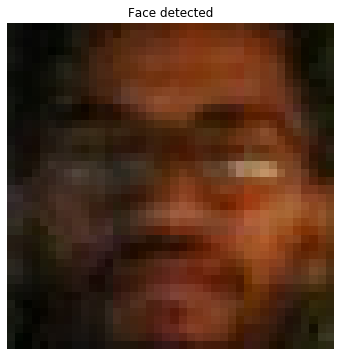

In [70]:
show_detected_face(night_image, detected)